In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

Index: 0, mnist_1_batch_size_1024_layer_2_hidden_size_16, params 13002
Index: 1, mnist_1_batch_size_1024_layer_2_hidden_size_128, params 118282
Index: 2, mnist_1_batch_size_1024_layer_2_hidden_size_512, params 669706
Index: 3, mnist_1_batch_size_1024_layer_2_hidden_size_1024, params 1863690
Index: 4, mnist_1_batch_size_1024_layer_4_hidden_size_16, params 13546
Index: 5, mnist_1_batch_size_1024_layer_4_hidden_size_128, params 151306
Index: 6, mnist_1_batch_size_1024_layer_4_hidden_size_512, params 1195018
Index: 7, mnist_1_batch_size_1024_layer_4_hidden_size_1024, params 3962890
Index: 8, mnist_1_batch_size_1024_layer_6_hidden_size_16, params 14090
Index: 9, mnist_1_batch_size_1024_layer_6_hidden_size_128, params 184330
Index: 10, mnist_1_batch_size_1024_layer_6_hidden_size_512, params 1720330
Index: 11, mnist_1_batch_size_1024_layer_6_hidden_size_1024, params 6062090
Index: 12, mnist_1_batch_size_1024_layer_8_hidden_size_16, params 14634
Index: 13, mnist_1_batch_size_1024_layer_8_hidde

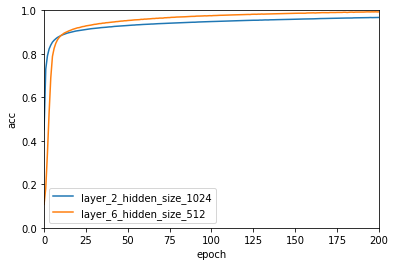

In [3]:
data_set = 'mnist'
epoch = 1000
batch_size = 1024
hidden_size = [16, 128, 512, 1024]
layer = [2, 4, 6, 8, 10]
nameAll = []
accAll = []
valaccAll = []
vallossAll = []
lossAll = []
paramsAll = []

for i in xrange(3):    
    for l in layer:
        for size in hidden_size:
            with open('./%s/%d_batch_size_%d_layer_%d_hidden_size_%d' % (data_set, i+1, batch_size, l, size), 'r') as history:
                #print('./%s/%d_batch_size_%d_layer_%d_hidden_size_%d' % (data_set, i+1, batch_size, l, size))
                h = json.load(history)
                acc = np.array(h.get('acc'))
                valacc = np.array(h.get('val_acc'))
                loss = np.array(h.get('loss'))
                valloss = np.array(h.get('val_loss'))
                valaccAll.append(valacc)
                vallossAll.append(valloss)
                lossAll.append(loss)
                nameAll.append('%s_%d_batch_size_%d_layer_%d_hidden_size_%d' % (data_set, i+1, batch_size, l, size))
                accAll.append(acc)
            for line in open('./%s/batch_size_%d_layer_%d_hidden_size_%d_summary' % (data_set, batch_size, l, size), 'r'):
                if 'Total params' in line:
                    params = int(line.replace(',', '').split(' ')[2])
                    paramsAll.append(params)
    break

for i in xrange(len(paramsAll)):
    print 'Index: %d, %s, params %d' % (i, np.array(nameAll[i]) , paramsAll[i])
    
pairs = [3, 10]

plt.figure(l)
plt.plot(accAll[3], label=nameAll[3].split(str(batch_size)+'_')[1])
plt.plot(accAll[10], label=nameAll[10].split(str(batch_size)+'_')[1])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.xlim(0, 200)
plt.ylim(0., 1.)
plt.legend()
plt.show()

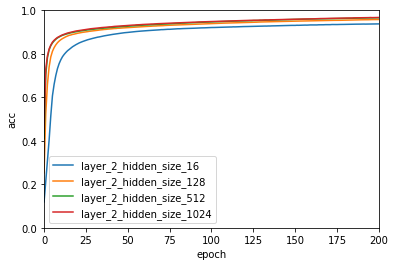

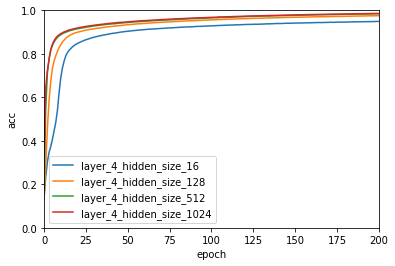

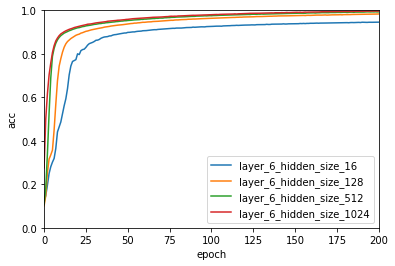

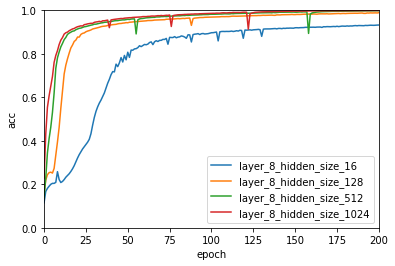

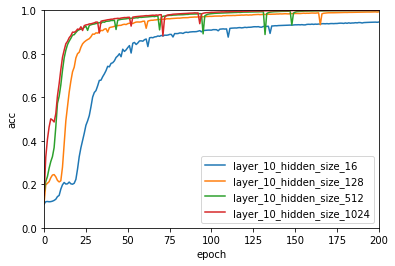

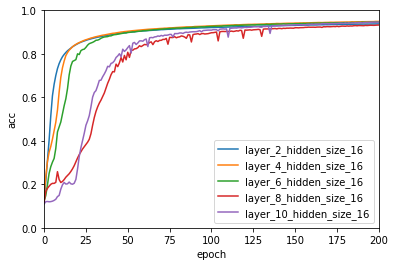

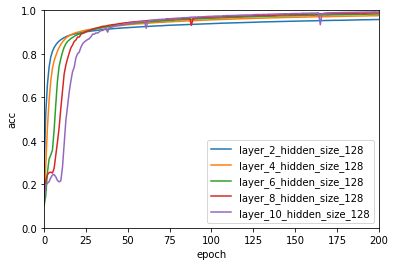

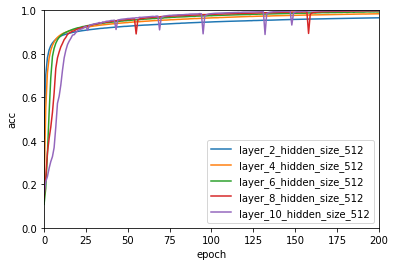

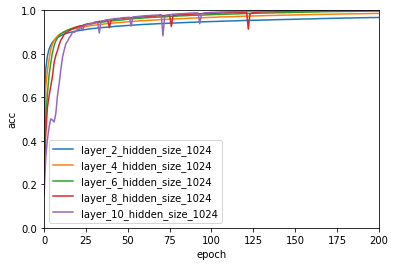

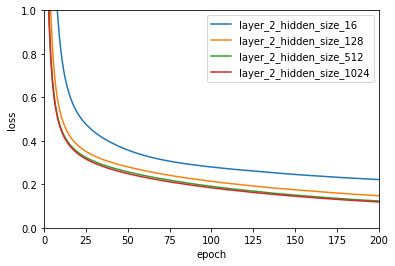

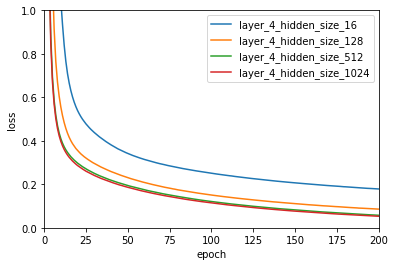

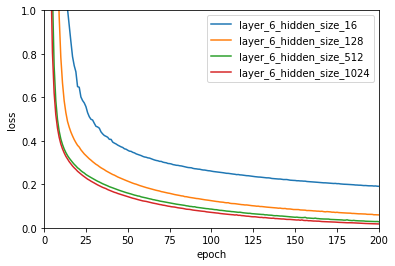

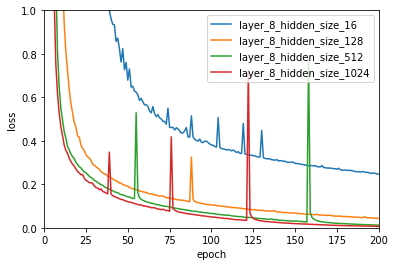

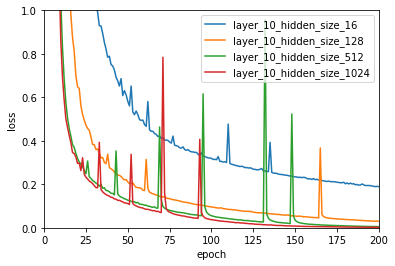

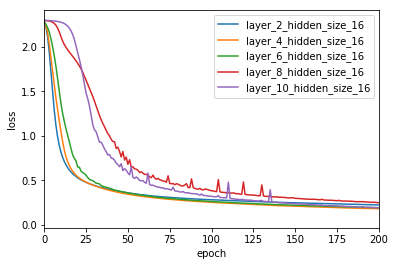

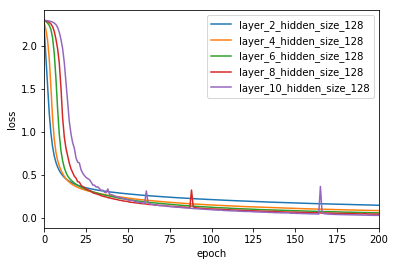

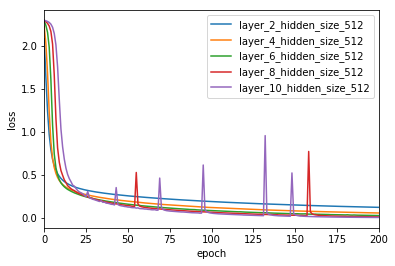

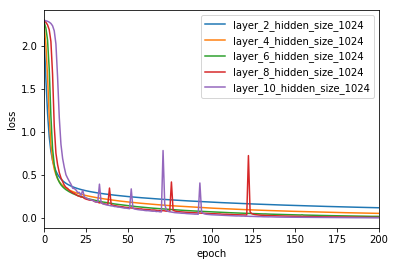

In [5]:
for l in xrange(len(layer)):
    plt.figure(l)
    for size in xrange(len(hidden_size)):
        plt.plot(accAll[(len(hidden_size))*l + size], label=nameAll[(len(hidden_size))*l + size].split(str(batch_size)+'_')[1])
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.xlim(0, 200)
    plt.ylim(0., 1.)
    plt.legend()
    plt.show()

for size in xrange(len(hidden_size)):
    plt.figure(size)
    for l in xrange(len(layer)):
        plt.plot(accAll[(len(hidden_size))*l + size], label=nameAll[(len(hidden_size))*l + size].split(str(batch_size)+'_')[1])
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.xlim(0, 200)
    plt.ylim(0., 1.)
    plt.legend()
    plt.show()

for l in xrange(len(layer)):
    plt.figure(l)
    for size in xrange(len(hidden_size)):
        plt.plot(lossAll[(len(hidden_size))*l + size], label=nameAll[(len(hidden_size))*l + size].split(str(batch_size)+'_')[1])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim(0, 200)
    plt.ylim(0., 1.)
    plt.legend()
    plt.show()
    
for size in xrange(len(hidden_size)):
    plt.figure(size)
    for l in xrange(len(layer)):
        plt.plot(lossAll[(len(hidden_size))*l + size], label=nameAll[(len(hidden_size))*l + size].split(str(batch_size)+'_')[1])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim(0, 200)
    plt.ylim()
    plt.legend()
    plt.show()


[0.7801]
['mnist_1_gaussian_0.000000_batch_size_1024_layer_2_hidden_size_16']
gaussian_0.000000_layer_2_hidden_size_16


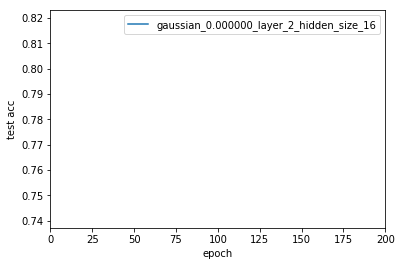

In [222]:
gaussian_proportion = [.0, .2, .4, .6, .8, 1.]
hidden_size = [16, 512, 1024]
layer = [2, 4, 8]
nameAll = []
accAll = []
valaccAll = []
vallossAll = []
lossAll = []
paramsAll = []
testaccAll = []
testlossAll = []

for i in xrange(3): 
    for proportion in gaussian_proportion:
        for size in hidden_size:
            for l in layer:
                with open('./%s/%d_gaussian_%f_batch_size_%d_layer_%d_hidden_size_%d' % (data_set, i+1, proportion, batch_size, l, size), 'r') as history:
                    #print('./%s/%d_gaussian_%f_batch_size_%d_layer_%d_hidden_size_%d' % (data_set, i+1, proportion, batch_size, l, size))
                    h = json.load(history)
                    acc = np.array(h.get('acc'))
                    valacc = np.array(h.get('val_acc'))
                    loss = np.array(h.get('loss'))
                    valloss = np.array(h.get('val_loss'))
                    valaccAll.append(valacc)
                    vallossAll.append(valloss)
                    lossAll.append(loss)
                    nameAll.append('%s_%d_gaussian_%f_batch_size_%d_layer_%d_hidden_size_%d' % (data_set, i+1, proportion, batch_size, l, size))
                    accAll.append(acc)
                for line in open('./%s/gaussian_%f_batch_size_%d_layer_%d_hidden_size_%d_summary' % (data_set, proportion, batch_size, l, size), 'r'):
                    if 'Total params' in line:
                        params = int(line.replace(',', '').split(' ')[2])
                        paramsAll.append(params)
                    if 'score' in line:
                        testloss = float(line.split(' ')[1])
                        testacc = float(line.split(' ')[2])
                        testaccAll.append(testacc)
                        testlossAll.append(testloss)
                break
            break
        break
    break
print testaccAll
print nameAll
for proportion in xrange(len(gaussian_proportion)):
    for size in xrange(len(hidden_size)):
        plt.figure(size)
        for l in xrange(len(layer)):
            print nameAll[(len(hidden_size))*l + size].replace('_batch_size_1024', '').replace('mnist_1_', '')
            plt.plot(testaccAll[(len(hidden_size))*l + size], label=nameAll[(len(hidden_size))*l + size].replace('_batch_size_1024', '').replace('mnist_1_', ''))
            break
        plt.xlabel('epoch')
        plt.ylabel('test acc')
        plt.xlim(0, 200)
        plt.ylim()
        plt.legend()
        plt.show()
        break
    break